In [1]:
#%matplotlib notebook

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

## DataFrames Related to COVID-19

In [3]:
# Reading csv files for COVID-19(Cases, Hospitalizations, Death) & NYC Boroughs

bronx_covid_data = "data/covid/Bronx-data-GHyLp.csv"
brooklyn_covid_data = "data/covid/Brooklyn-data-Q7Zjo.csv"
manhattan_covid_data = "data/covid/Manhattan-data-rqvAu.csv"
queens_covid_data = "data/covid/Queens-data-HXuvT.csv"
staten_island_covid_data = "data/covid/Staten Island-data-u1Bfw.csv"

bronx_df = pd.read_csv(bronx_covid_data)
brooklyn_df = pd.read_csv(brooklyn_covid_data)
manhattan_df = pd.read_csv(manhattan_covid_data)
queens_df = pd.read_csv(queens_covid_data)
staten_island_df = pd.read_csv(staten_island_covid_data)

bronx_df.dtypes

DATE_OF_INTEREST    object
Cases                int64
Hospitalizations     int64
Deaths               int64
dtype: object

In [4]:
# Creating a DataFrame for Total Number of COVIS-19 Cases, Hospitalizations & Death

covid_total_df = pd.DataFrame()

covid_total_df['Date'] = bronx_df['DATE_OF_INTEREST']

covid_total_df['Total Cases']=""
covid_total_df['Total Hospitalizations']=""
covid_total_df['Total Deaths']=""
covid_total_df

,Date,Total Cases,Total Hospitalizations,Total Deaths
0,02/29/2020,,,
1,03/01/2020,,,
2,03/02/2020,,,
3,03/03/2020,,,
4,03/04/2020,,,
...,...,...,...,...
90,05/29/2020,,,
91,05/30/2020,,,
92,05/31/2020,,,
93,06/01/2020,,,


In [5]:
# Filling the columns

for i in range (len(covid_total_df)):
    covid_total_df.loc[i,'Total Cases'] = bronx_df.iloc[i,1]+brooklyn_df.iloc[i,1]+staten_island_df.iloc[i,1]+manhattan_df.iloc[i,1]+queens_df.iloc[i,1]
    covid_total_df.loc[i,'Total Hospitalizations'] = bronx_df.iloc[i,2]+brooklyn_df.iloc[i,2]+staten_island_df.iloc[i,2]+manhattan_df.iloc[i,2]+queens_df.iloc[i,2]
    covid_total_df.loc[i,'Total Deaths'] = bronx_df.iloc[i,3]+brooklyn_df.iloc[i,3]+staten_island_df.iloc[i,3]+manhattan_df.iloc[i,3]+queens_df.iloc[i,3]

covid_total_df['Total Cases'] = covid_total_df['Total Cases'].astype('int32')
covid_total_df['Total Hospitalizations'] = covid_total_df['Total Hospitalizations'].astype('int32')
covid_total_df['Total Deaths'] = covid_total_df['Total Deaths'].astype('int32')

covid_total_df.dtypes


Date                      object
Total Cases                int32
Total Hospitalizations     int32
Total Deaths               int32
dtype: object

In [6]:
# Finding the start Date of COVID-19 & Latest Date

start_date = covid_total_df.iloc[0,0]

latest_date = covid_total_df.iloc[-1,0]

print('Start Date: '+start_date+ ' & Latest Date: '+ latest_date)

Start Date: 02/29/2020 & Latest Date: 06/02/2020


## DataFrames Related to CRIMES

In [7]:
# Reading the CSV file for New York City Police Department

nypd = "data/crimes/NYPD.csv"
nypd_data = pd.read_csv(nypd)
nypd_data.head()

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (31) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,45975594,04/11/2020 01:50:25 AM,04/11/2020 02:27:47 AM,NYPD,New York City Police Department,Non-Emergency Police Matter,Social Distancing,Residential Building/House,10025.0,222 WEST 104 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.799478,-73.967504,"(40.799477899696285, -73.96750426182348)"
1,45975654,04/11/2020 12:14:28 AM,04/11/2020 02:17:36 AM,NYPD,New York City Police Department,Non-Emergency Police Matter,Social Distancing,NaN,10451.0,304 EAST 156 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.821747,-73.919234,"(40.82174682885639, -73.9192338660681)"
2,45975989,04/10/2020 06:31:17 PM,04/11/2020 05:48:01 AM,NYPD,New York City Police Department,Noise - Residential,Banging/Pounding,Residential Building/House,11419.0,107-11 129 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.686233,-73.814735,"(40.68623317590883, -73.81473500807529)"
3,45975997,04/11/2020 12:31:45 AM,04/11/2020 07:57:45 AM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11102.0,25-57 31 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.769635,-73.918557,"(40.76963491074108, -73.91855696912114)"
4,45976007,04/10/2020 11:31:56 PM,04/11/2020 03:27:47 AM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10458.0,340 EAST 184 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.858098,-73.895670,"(40.858098079528844, -73.89567035668057)"


In [8]:
# Checking the columns for costomization

nypd_data.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Action Updated Date', 'Community Board', 'Borough',
       'X Coordinate (State Plane)', 'Y Coordinate (State Plane)',
       'Park Facility Name', 'Park Borough', 'Vehicle Type',
       'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Latitude', 'Longitude', 'Location'],
      dtype='object')

In [9]:
# Selecting the required columns for creating a new dataFrame

nypd_columns = ['Created Date', 'Complaint Type', 'Descriptor', 'Location Type','Incident Address','City','Borough','Latitude', 'Longitude']

nypd_df = nypd_data[nypd_columns].copy()

nypd_df

,Created Date,Complaint Type,Descriptor,Location Type,Incident Address,City,Borough,Latitude,Longitude
0,04/11/2020 01:50:25 AM,Non-Emergency Police Matter,Social Distancing,Residential Building/House,222 WEST 104 STREET,NEW YORK,MANHATTAN,40.799478,-73.967504
1,04/11/2020 12:14:28 AM,Non-Emergency Police Matter,Social Distancing,NaN,304 EAST 156 STREET,BRONX,BRONX,40.821747,-73.919234
2,04/10/2020 06:31:17 PM,Noise - Residential,Banging/Pounding,Residential Building/House,107-11 129 STREET,SOUTH RICHMOND HILL,QUEENS,40.686233,-73.814735
3,04/11/2020 12:31:45 AM,Noise - Residential,Loud Music/Party,Residential Building/House,25-57 31 STREET,ASTORIA,QUEENS,40.769635,-73.918557
4,04/10/2020 11:31:56 PM,Noise - Residential,Loud Music/Party,Residential Building/House,340 EAST 184 STREET,BRONX,BRONX,40.858098,-73.895670
...,...,...,...,...,...,...,...,...,...
320192,04/29/2020 02:50:10 PM,Blocked Driveway,Partial Access,Street/Sidewalk,3600 CORLEAR AVENUE,BRONX,BRONX,40.884454,-73.903119
320193,04/29/2020 02:50:13 PM,Blocked Driveway,Partial Access,Street/Sidewalk,3600 CORLEAR AVENUE,BRONX,BRONX,40.884454,-73.903119
320194,04/29/2020 02:50:29 PM,Blocked Driveway,No Access,Street/Sidewalk,76-19 91 AVENUE,WOODHAVEN,QUEENS,40.686247,-73.864151
320195,04/29/2020 02:50:26 PM,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,220 STEWART AVENUE,BROOKLYN,BROOKLYN,40.713264,-73.927727


In [10]:
# Removing Unspecified from Borough Column
nypd_df = nypd_df[nypd_df['Borough'] != "Unspecified"]

# Checking for being sure that Boroughs are Correct
nypd_df['Borough'].unique()

array(['MANHATTAN', 'BRONX', 'QUEENS', 'BROOKLYN', 'STATEN ISLAND'],
      dtype=object)

In [11]:
# Sorting the NYPD DataFrame by Dates
nypd_df= nypd_df.sort_values(['Created Date'])

nypd_df

,Created Date,Complaint Type,Descriptor,Location Type,Incident Address,City,Borough,Latitude,Longitude
134381,02/01/2020 01:00:00 AM,Noise - Commercial,Loud Music/Party,Store/Commercial,110-46 SUTPHIN BOULEVARD,JAMAICA,QUEENS,40.689070,-73.795951
134287,02/01/2020 01:00:16 AM,Noise - Residential,Banging/Pounding,Residential Building/House,200 BENNETT AVENUE,NEW YORK,MANHATTAN,40.856471,-73.933865
143083,02/01/2020 01:00:16 PM,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,425 EAST 14 STREET,NEW YORK,MANHATTAN,40.731055,-73.981783
141734,02/01/2020 01:00:19 PM,Illegal Parking,Blocked Hydrant,Street/Sidewalk,1485 HOE AVENUE,BRONX,BRONX,40.832816,-73.889368
134360,02/01/2020 01:00:48 AM,Noise - Residential,Banging/Pounding,Residential Building/House,1768 77 STREET,BROOKLYN,BROOKLYN,40.612740,-73.998055
...,...,...,...,...,...,...,...,...,...
319095,06/02/2020 12:57:54 AM,Illegal Parking,Blocked Hydrant,Street/Sidewalk,34 AVENUE,NaN,QUEENS,40.751932,-73.902156
318261,06/02/2020 12:58:50 AM,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,488 WEST 130 STREET,NEW YORK,MANHATTAN,40.815552,-73.954126
319569,06/02/2020 12:58:57 AM,Noise - Residential,Loud Music/Party,Residential Building/House,95 OLD BROADWAY,NEW YORK,MANHATTAN,40.818146,-73.955374
318854,06/02/2020 12:59:13 AM,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,37-37 83 STREET,JACKSON HEIGHTS,QUEENS,40.749505,-73.883310


In [12]:
# Removing information of before the Start Date of COVID-19 from NYPD
nypd_df = nypd_df.loc[nypd_df['Created Date'] > start_date]

# Removing NA Rows
nypd_final_df = nypd_df.dropna()

nypd_final_df

,Created Date,Complaint Type,Descriptor,Location Type,Incident Address,City,Borough,Latitude,Longitude
22915,02/29/2020 01:00:47 AM,Illegal Parking,Blocked Hydrant,Street/Sidewalk,1550 EAST 96 STREET,BROOKLYN,BROOKLYN,40.635450,-73.892913
25956,02/29/2020 01:01:36 PM,Illegal Parking,Blocked Bike Lane,Street/Sidewalk,720 BROADWAY,NEW YORK,MANHATTAN,40.729203,-73.993567
25421,02/29/2020 01:01:56 AM,Noise - Residential,Loud Music/Party,Residential Building/House,772 DEAN STREET,BROOKLYN,BROOKLYN,40.679474,-73.964574
26193,02/29/2020 01:02:10 AM,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,131 CHRYSTIE STREET,NEW YORK,MANHATTAN,40.719369,-73.993218
24203,02/29/2020 01:02:39 PM,Noise - Residential,Loud Music/Party,Residential Building/House,1973 81 STREET,BROOKLYN,BROOKLYN,40.607898,-73.996035
...,...,...,...,...,...,...,...,...,...
318972,06/02/2020 12:57:49 AM,Non-Emergency Police Matter,Social Distancing,Store/Commercial,45-20 GREENPOINT AVENUE,SUNNYSIDE,QUEENS,40.741936,-73.919623
318261,06/02/2020 12:58:50 AM,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,488 WEST 130 STREET,NEW YORK,MANHATTAN,40.815552,-73.954126
319569,06/02/2020 12:58:57 AM,Noise - Residential,Loud Music/Party,Residential Building/House,95 OLD BROADWAY,NEW YORK,MANHATTAN,40.818146,-73.955374
318854,06/02/2020 12:59:13 AM,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,37-37 83 STREET,JACKSON HEIGHTS,QUEENS,40.749505,-73.883310


In [13]:
# Removing Time from Date Column
nypd_final_df['Created Date']= nypd_final_df['Created Date'].str.split(" ", n=1, expand= True)

# Renaming the column
nypd_final_df= nypd_final_df.rename(columns={'Created Date': 'Date'})

nypd_final_df

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Date,Complaint Type,Descriptor,Location Type,Incident Address,City,Borough,Latitude,Longitude
22915,02/29/2020,Illegal Parking,Blocked Hydrant,Street/Sidewalk,1550 EAST 96 STREET,BROOKLYN,BROOKLYN,40.635450,-73.892913
25956,02/29/2020,Illegal Parking,Blocked Bike Lane,Street/Sidewalk,720 BROADWAY,NEW YORK,MANHATTAN,40.729203,-73.993567
25421,02/29/2020,Noise - Residential,Loud Music/Party,Residential Building/House,772 DEAN STREET,BROOKLYN,BROOKLYN,40.679474,-73.964574
26193,02/29/2020,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,131 CHRYSTIE STREET,NEW YORK,MANHATTAN,40.719369,-73.993218
24203,02/29/2020,Noise - Residential,Loud Music/Party,Residential Building/House,1973 81 STREET,BROOKLYN,BROOKLYN,40.607898,-73.996035
...,...,...,...,...,...,...,...,...,...
318972,06/02/2020,Non-Emergency Police Matter,Social Distancing,Store/Commercial,45-20 GREENPOINT AVENUE,SUNNYSIDE,QUEENS,40.741936,-73.919623
318261,06/02/2020,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,488 WEST 130 STREET,NEW YORK,MANHATTAN,40.815552,-73.954126
319569,06/02/2020,Noise - Residential,Loud Music/Party,Residential Building/House,95 OLD BROADWAY,NEW YORK,MANHATTAN,40.818146,-73.955374
318854,06/02/2020,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,37-37 83 STREET,JACKSON HEIGHTS,QUEENS,40.749505,-73.883310


In [14]:
# Creating Total Number of Crimes based on date

crimes_total_df = nypd_final_df.groupby(['Date']).count()
crimes_total_df = crimes_total_df.reset_index()
crimes_total_df

,Date,Complaint Type,Descriptor,Location Type,Incident Address,City,Borough,Latitude,Longitude
0,02/29/2020,1831,1831,1831,1831,1831,1831,1831,1831
1,03/01/2020,1845,1845,1845,1845,1845,1845,1845,1845
2,03/02/2020,1470,1470,1470,1470,1470,1470,1470,1470
3,03/03/2020,1447,1447,1447,1447,1447,1447,1447,1447
4,03/04/2020,1405,1405,1405,1405,1405,1405,1405,1405
...,...,...,...,...,...,...,...,...,...
90,05/29/2020,3510,3510,3510,3510,3510,3510,3510,3510
91,05/30/2020,4976,4976,4976,4976,4976,4976,4976,4976
92,05/31/2020,4702,4702,4702,4702,4702,4702,4702,4702
93,06/01/2020,2258,2258,2258,2258,2258,2258,2258,2258


In [15]:
# Creating Separate DataFrame based on Boroughs from Final Crime DF

bronx_pd = nypd_final_df.loc[nypd_final_df['Borough'] == 'BRONX']
brooklyn_pd = nypd_final_df.loc[nypd_final_df['Borough'] == 'BROOKLYN']
manhattan_pd = nypd_final_df.loc[nypd_final_df['Borough'] == 'MANHATTAN']
queens_pd = nypd_final_df.loc[nypd_final_df['Borough'] == 'QUEENS']
staten_island_pd = nypd_final_df.loc[nypd_final_df['Borough'] == 'STATEN ISLAND']

## Creating CHARTS

<function matplotlib.pyplot.show(*args, **kw)>

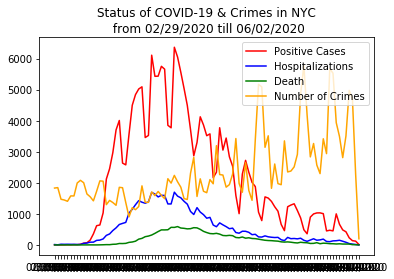

<Figure size 720x288 with 0 Axes>

In [16]:
# Line charts for all data from the start date till today

cases_handle, = plt.plot(covid_total_df['Date'],covid_total_df['Total Cases'], color='r', label = 'Positive Cases')
hospitalization_handle, = plt.plot(covid_total_df['Date'],covid_total_df['Total Hospitalizations'], color ='b', label = 'Hospitalizations')
death_handle, = plt.plot(covid_total_df['Date'],covid_total_df['Total Deaths'], color = 'g', label = 'Death')
crimes_handle, = plt.plot(crimes_total_df['Date'],crimes_total_df['Complaint Type'], color='orange', label = 'Number of Crimes')
plt.legend(loc = 'best')

plt.title('Status of COVID-19 & Crimes in NYC\n from ' +start_date+ ' till '+latest_date)

plt.figure(figsize=(10,4))

plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

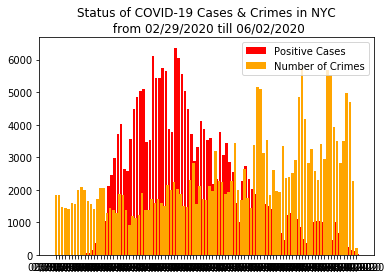

<Figure size 720x288 with 0 Axes>

In [17]:
cases = plt.bar(covid_total_df['Date'],covid_total_df['Total Cases'], color='r', label = 'Positive Cases', align = 'edge')
crimes = plt.bar(crimes_total_df['Date'],crimes_total_df['Complaint Type'], color='orange', label = 'Number of Crimes')
plt.legend(loc = 'best')

plt.title('Status of COVID-19 Cases & Crimes in NYC\n from ' +start_date+ ' till '+ latest_date)

plt.figure(figsize=(10,4))

plt.tight_layout()
plt.show

### Setting Date and Borough instead of DropDown

In [18]:
print (f"the first date : {covid_total_df.iloc[0,0]}  the latest date: {covid_total_df.iloc[-1,0]}  the selected date should be in between:")
date=input("date: MM/D/2020? ")

the first date : 02/29/2020  the latest date: 06/02/2020  the selected date should be in between:


date: MM/D/2020?  06/02/2020


In [19]:
borough = input("Borough: BRONX, BROOKLYN, STATEN ISLAND, MANHATTAN, QUEENS? ")

Borough: BRONX, BROOKLYN, STATEN ISLAND, MANHATTAN, QUEENS?  MANHATTAN


In [20]:
if (borough == 'BRONX'):
    database = bronx_df;
    database2 = bronx_pd
elif (borough == 'BROOKLYN'):
    database = brooklyn_df;
    database2 = brooklyn_pd
elif (borough == 'STATEN ISLAND'):
    database = staten_island_df;
    database2 = staten_island_pd
elif (borough == 'MANHATTAN'):
    database = manhattan_df;
    database2 = manhattan_pd
else:
    database = queens_df;
    database2 = queens_pd

In [21]:
# DataFrame for COVID-19
database

,DATE_OF_INTEREST,Cases,Hospitalizations,Deaths
0,02/29/2020,1,2,0
1,03/01/2020,0,0,0
2,03/02/2020,0,4,0
3,03/03/2020,0,2,0
4,03/04/2020,2,5,0
...,...,...,...,...
90,05/29/2020,50,15,3
91,05/30/2020,36,5,4
92,05/31/2020,21,3,0
93,06/01/2020,19,2,0


In [22]:
# DataFrame for CRIMES
database2

,Date,Complaint Type,Descriptor,Location Type,Incident Address,City,Borough,Latitude,Longitude
25956,02/29/2020,Illegal Parking,Blocked Bike Lane,Street/Sidewalk,720 BROADWAY,NEW YORK,MANHATTAN,40.729203,-73.993567
26193,02/29/2020,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,131 CHRYSTIE STREET,NEW YORK,MANHATTAN,40.719369,-73.993218
22447,02/29/2020,Noise - Vehicle,Engine Idling,Street/Sidewalk,650 WEST 168 STREET,NEW YORK,MANHATTAN,40.841635,-73.941090
22394,02/29/2020,Noise - Residential,Banging/Pounding,Residential Building/House,281 WADSWORTH AVENUE,NEW YORK,MANHATTAN,40.853720,-73.932114
23412,02/29/2020,Noise - Commercial,Loud Music/Party,Store/Commercial,1626 SECOND AVENUE,NEW YORK,MANHATTAN,40.776801,-73.952517
...,...,...,...,...,...,...,...,...,...
317748,06/02/2020,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,234 WEST 114 STREET,NEW YORK,MANHATTAN,40.802361,-73.954557
317780,06/02/2020,Noise - Park,Loud Music/Party,Park/Playground,200 WEST 64 STREET,NEW YORK,MANHATTAN,40.773536,-73.985363
317796,06/02/2020,Noise - Residential,Loud Television,Residential Building/House,746 ST NICHOLAS AVENUE,NEW YORK,MANHATTAN,40.825566,-73.943630
318261,06/02/2020,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,488 WEST 130 STREET,NEW YORK,MANHATTAN,40.815552,-73.954126


In [23]:
# creating the COVID-19 DataFrame Based on Input Date

selected_date = database.loc[database['DATE_OF_INTEREST'] == date]
selected_date

,DATE_OF_INTEREST,Cases,Hospitalizations,Deaths
94,06/02/2020,1,0,0


In [24]:
# creating the Crimes DataFrame Based on Input Date

selected_crime_data = database2.loc[database2['Date'] == date]
grouped_crimes = selected_crime_data.groupby(['Complaint Type']).count()
grouped_crimes

,Date,Descriptor,Location Type,Incident Address,City,Borough,Latitude,Longitude
Complaint Type,,,,,,,,
Blocked Driveway,1,1,1,1,1,1,1,1
Noise - Commercial,3,3,3,3,3,3,3,3
Noise - Park,1,1,1,1,1,1,1,1
Noise - Residential,22,22,22,22,22,22,22,22
Noise - Street/Sidewalk,16,16,16,16,16,16,16,16
Noise - Vehicle,1,1,1,1,1,1,1,1
Non-Emergency Police Matter,2,2,2,2,2,2,2,2


In [25]:
# creating the Crimes DataFrame Based on Borough

grouped_database2 = database2.groupby(['Date']).count().reset_index()
grouped_database2

,Date,Complaint Type,Descriptor,Location Type,Incident Address,City,Borough,Latitude,Longitude
0,02/29/2020,445,445,445,445,445,445,445,445
1,03/01/2020,347,347,347,347,347,347,347,347
2,03/02/2020,265,265,265,265,265,265,265,265
3,03/03/2020,279,279,279,279,279,279,279,279
4,03/04/2020,278,278,278,278,278,278,278,278
...,...,...,...,...,...,...,...,...,...
90,05/29/2020,705,705,705,705,705,705,705,705
91,05/30/2020,1223,1223,1223,1223,1223,1223,1223,1223
92,05/31/2020,1044,1044,1044,1044,1044,1044,1044,1044
93,06/01/2020,434,434,434,434,434,434,434,434


### Creating Pie Chart of COVID-19 for selected Date

In [26]:
x_axis = ['Positive Cases','Hospitalizations', 'Deaths']
y1 = selected_date.iloc[0,1]
y2 = selected_date.iloc[0,2]
y3 = selected_date.iloc[0,3]
y_axis = [y1, y2, y3]

<function matplotlib.pyplot.show(*args, **kw)>

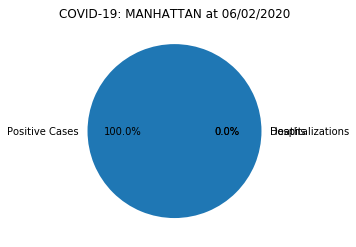

In [27]:
plt.pie(y_axis, labels = x_axis, autopct = "%1.1f%%")

plt.title("COVID-19: " +borough+" at " +date)

plt.show

### Creating Bar Chart of Crimes for selected Date

<function matplotlib.pyplot.show(*args, **kw)>

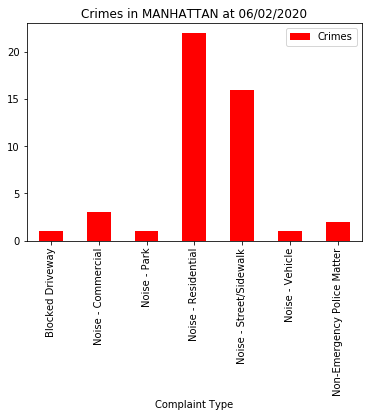

In [28]:
grouped_crimes.plot.bar(y='Date', label = "Crimes", color ='r')

plt.title("Crimes in "+ borough+ " at "+ date)

plt.show

### Creating Line Chart of Crimes & COVID-19 for selected Borough

<function matplotlib.pyplot.show(*args, **kw)>

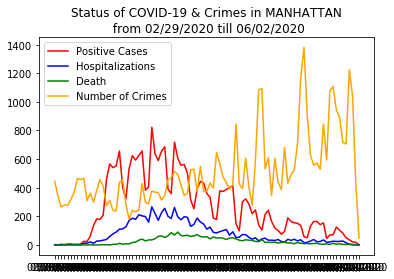

<Figure size 720x288 with 0 Axes>

In [29]:
cases_handle, = plt.plot(database['DATE_OF_INTEREST'],database['Cases'], color='r', label = 'Positive Cases')
hospitalization_handle, = plt.plot(database['DATE_OF_INTEREST'],database['Hospitalizations'], color ='b', label = 'Hospitalizations')
death_handle, = plt.plot(database['DATE_OF_INTEREST'],database['Deaths'], color = 'g', label = 'Death')
crimes_handle, = plt.plot(grouped_database2['Date'],grouped_database2['Complaint Type'], color='orange', label = 'Number of Crimes')
plt.legend(loc = 'best')

plt.title('Status of COVID-19 & Crimes in '+borough+'\n from ' +start_date+ ' till '+latest_date)

plt.figure(figsize=(10,4))

plt.tight_layout()
plt.show

### Saving all created DataFrames

In [30]:
saving_path = "data/created data"

covid_total_df.to_csv(saving_path+"/covid_total_df.csv")

nypd_final_df.to_csv(saving_path+"/nypd_final_df.csv")

bronx_pd.to_csv(saving_path+"/bronx_pd.csv")
brooklyn_pd.to_csv(saving_path+"/brooklyn_pd.csv")
manhattan_pd.to_csv(saving_path+"/manhattan_pd.csv")
queens_pd.to_csv(saving_path+"/queens_pd.csv")
staten_island_pd.to_csv(saving_path+"/staten_island_pd.csv")

crimes_total_df.to_csv(saving_path+"/crimes_total_df.csv")

# Another Type of Charts -- WE DO NOT NEED BELOW CODES


Text(0.5, 1.0, 'MANHATTAN at 06/02/2020')

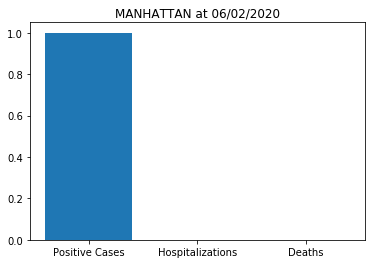

In [31]:
plt.bar(x_axis, y_axis)
plt.title(borough+" at " +date)

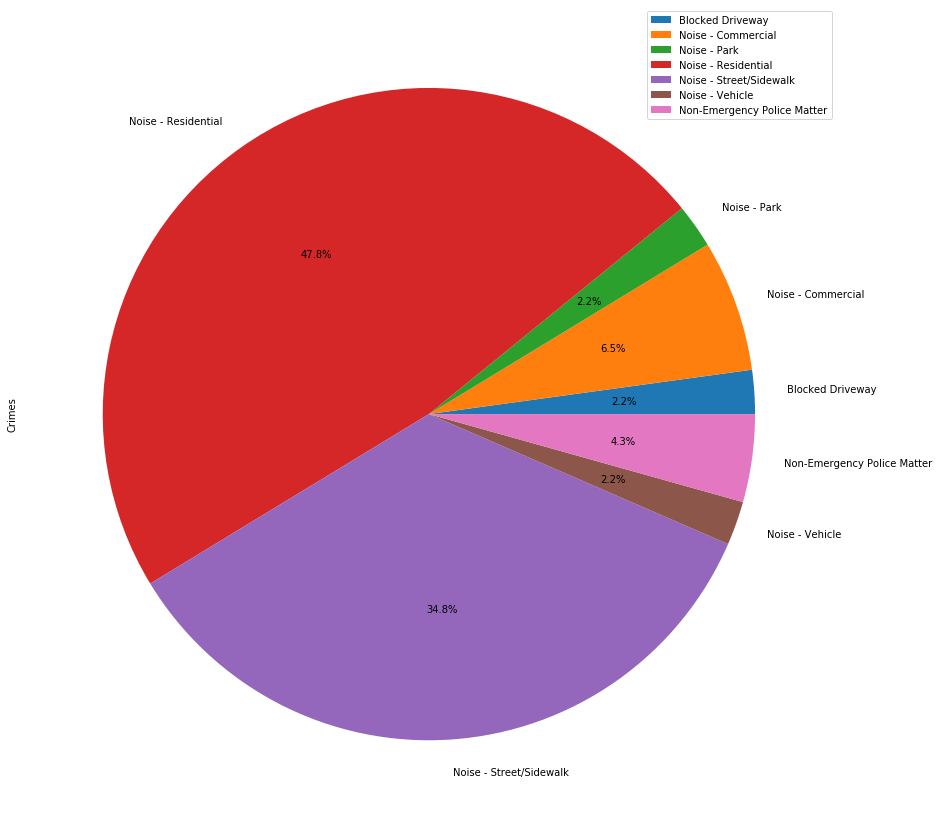

In [32]:
grouped_crimes.plot.pie(y='Date', label = "Crimes", figsize = (15, 15), autopct = "%1.1f%%")

In [ ]:
cases_handle, = plt.plot(covid_total_df['Date'],covid_total_df['Total Cases'], color='r', label = 'Positive Cases')
hospitalization_handle, = plt.plot(covid_total_df['Date'],covid_total_df['Total Hospitalizations'], color ='b', label = 'Hospitalizations')
death_handle, = plt.plot(covid_total_df['Date'],covid_total_df['Total Deaths'], color = 'g', label = 'Death')

plt.legend(loc = 'upper right')
plt.title('Status of COVID-19 in NYC Since '+start_date)
plt.figure(figsize=(10,4))

plt.tight_layout()
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

In [ ]:
crimes_handle, = plt.plot(crimes_total_df['Date'],crimes_total_df['Complaint Type'], color='orange', label = 'Number of Crimes')

plt.legend(loc = 'best')

# plt.figure(figsize=(10,4))
plt.title('Number of Crimes in NYC Since '+start_date)
plt.tight_layout()
plt.show

In [ ]:
bronx_df['Borough'] = 'Bronx'
brooklyn_df['Borough'] = 'Brooklyn'
manhattan_df['Borough'] = 'Manhattan'
queens_df['Borough'] = 'Queens'
staten_island_df['Borough'] = 'staten Island'
frames = [bronx_df, brooklyn_df, manhattan_df, queens_df, staten_island_df]
result_covid = pd.concat(frames).reset_index()
#result_covid.reset_index()

result_covid=result_covid.drop(columns=['index'])
result_covid.tail()

In [ ]:
connection_string = "postgres:postgres@localhost:5432/NYC_COVID19_CRIMES_DB"
engine = create_engine(f'postgresql://{connection_string}')

#covid_total_df.to_sql(name='covid_total_df', con=engine, if_exists='replace', index=True)
result_covid.to_sql(name='covid', con=engine, if_exists='replace', index=True)
nypd_final_df.to_sql(name='crime', con=engine, if_exists='replace', index=True)
#bronx_df.to_sql(name='bronx_df', con=engine, if_exists='replace', index=False)
#brooklyn_df.to_sql(name='brooklyn_df', con=engine, if_exists='replace', index=False)
#manhattan_df.to_sql(name='manhattan_df', con=engine, if_exists='replace', index=False)
#queens_df.to_sql(name='queens_df', con=engine, if_exists='replace', index=False)
#staten_island_df.to_sql(name='staten_island_df', con=engine, if_exists='replace', index=False)